In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$\gamma \geq \dfrac{3-S^2_\infty}{3(1+S^2_\infty)}$$

In [2]:
def gamma_lower_limit_no_delta(S):
    return (3-S**2)/(3*(1+S**2))

In [3]:
def gamma_upper_limit_no_delta(S):
    return (1+S**2)**(-1)

In [4]:
Sinf = np.arange(-10**(-3),2.1,0.0001)
g = gamma_lower_limit_no_delta(Sinf)

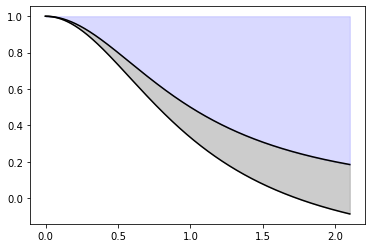

In [5]:
plt.fill_between(Sinf,g,gamma_upper_limit_no_delta(Sinf),color="k",alpha=0.2)
plt.fill_between(Sinf,gamma_upper_limit_no_delta(Sinf),1.,color="b",alpha=0.15)
plt.plot(Sinf,gamma_upper_limit_no_delta(Sinf),c="k")
plt.plot(Sinf,g,c="k")
# plt.ylabel(r"$\gamma$",fontsize=14)
# plt.xlabel(r"$S_\infty$",fontsize=14)
# plt.text(2.5,0.5,"Symmetrically Unstable",fontsize=16)
# plt.text(4,-0.15,"PSI Unstable",fontsize=16)
# plt.text(0,-0.15,"Stable",fontsize=16)
# plt.title(r"Unstable Region for $\gamma$ with respect to $S_\infty$ and $\delta=0$")
# plt.savefig("Stability_Diagram_delta_0.jpeg")
plt.show()

$$ \gamma \geq \dfrac{3-S^2_\infty}{3(1+S^2_\infty)-4\delta S^2_\infty} $$ 

In [6]:
def gamma_lower_limit(S,d):
    v = (3-S**2)/(3*(1+S**2)-4*d*S**2)
    if type(v)!=float:
        v[v<=0]=0
        return v
    else:
        return v

In [7]:
def gamma_lower_limit_upwelling(S,d):
    v = (3-S**2)/(3*(1+S**2)-4*d*S**2)
    if type(v)!=float:
        new_array = v[v<=0]
        new_S = S[v<=0]
        return new_array, new_S
    else:
        return S, v

In [8]:
def gamma_upper_limit(S,d):
    return (1+(1-d)*S**2)**(-1)

In [9]:
deltafix = 0.5
gd = gamma_lower_limit(Sinf,deltafix)
gd[-1]

0.0

In [10]:
gamma_upper_limit(1.5,deltafix)

0.47058823529411764

In [11]:
 (gamma_lower_limit(1.5,deltafix)+ gamma_lower_limit(1.5,deltafix))/2

0.14285714285714285

In [61]:
gammalist[26]

0.05

In [62]:
Sinflist = [0.1,0.1,0.1,0.5,0.5,0.5,1.0,1.0,1.0,1.5,1.5,1.5,2.0,2.0,2.0,0.25,0.25,0.25,0.75,0.75,0.75,1.25,1.25,1.25,1.75,1.75,1.75]
gammalist = [ gamma_upper_limit(0.1,deltafix), (gamma_upper_limit(0.1,deltafix)+ gamma_lower_limit(0.1,deltafix))/2,
                 gamma_upper_limit(0.1,deltafix),gamma_upper_limit(0.5,deltafix), 
                 (gamma_upper_limit(0.5,deltafix)+ gamma_lower_limit(0.5,deltafix))/2,
                 gamma_lower_limit(0.5,deltafix),gamma_upper_limit(1,deltafix), 
                 (gamma_upper_limit(1,deltafix)+ gamma_lower_limit(1,deltafix))/2,
                 gamma_lower_limit(1,deltafix),gamma_upper_limit(1.5,deltafix), 
                 (gamma_upper_limit(1.5,deltafix)+ gamma_lower_limit(1.5,deltafix))/2,
                 gamma_lower_limit(1.5,deltafix), gamma_upper_limit(2,deltafix), 
                 (gamma_upper_limit(2,deltafix)+ gamma_lower_limit(2,deltafix))/2,
                 0.05,gamma_upper_limit(0.25,deltafix),
                (gamma_upper_limit(0.25,deltafix)+ gamma_lower_limit(0.25,deltafix))/2,
                gamma_lower_limit(0.25,deltafix),gamma_upper_limit(0.75,deltafix),
                (gamma_upper_limit(0.75,deltafix)+ gamma_lower_limit(0.75,deltafix))/2,
                gamma_lower_limit(0.75,deltafix),gamma_upper_limit(1.25,deltafix),
                (gamma_upper_limit(1.25,deltafix)+ gamma_lower_limit(1.25,deltafix))/2,
                 gamma_lower_limit(1.25,deltafix),gamma_upper_limit(1.75,deltafix),
                (gamma_upper_limit(1.75,deltafix)+ gamma_lower_limit(1.75,deltafix))/2,
                0.05]
growth_rates = np.array([0.2241,0.2318,0.2419,0.2029,0.2182,0.2365,0.1724,0.1883,0.1713,0.1415,0.09712,0.06245,
                    0,0.01693,0.02195,0.2250,0.2341,0.2345,0.1873,0.2055,0.2075,0.1582,0.1491,0.1204,0.09481,0.04663,0.01544])

In [63]:
1e-5*(1-gamma_lower_limit(1,deltafix))

5e-06

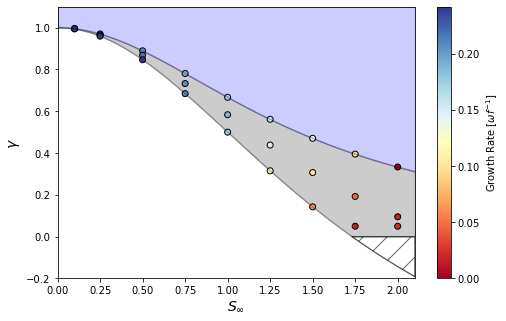

In [64]:
plt.figure(figsize=(8,5))
plt.fill_between(Sinf,gd,gamma_upper_limit(Sinf,deltafix),color="k",alpha=0.2)
plt.fill_between(Sinf,gamma_upper_limit(Sinf,deltafix),1.1,color="b",alpha=0.2)
# plt.plot(Sinf,gamma_upper_limit(Sinf,deltafix),c="k",alpha=0.5)
gmu, Sm =gamma_lower_limit_upwelling(Sinf,deltafix)
plt.fill_between(Sm,gmu,0,color="k",facecolor="none",alpha=0.6,hatch="/")
# plt.plot(Sinf,gd,c="k",alpha=0.5)
plt.plot(Sinf,gamma_upper_limit(Sinf,deltafix),c="k",alpha=0.25)
plt.plot(Sinf,gd,c="k",alpha=0.25)
plt.plot(Sm,gmu,c="k",alpha=0.25)
plt.scatter(Sinflist,gammalist,c=growth_rates,alpha=1,cmap="RdYlBu",edgecolors="k") # RdYlGn_r
plt.colorbar(label=r"Growth Rate [$\omega f^{-1}$]")
plt.ylabel(r"$\gamma$",fontsize=14)
plt.xlabel(r"$S_\infty$",fontsize=14)
# plt.text(1.5,0.8,"SI",fontsize=16)
# plt.text(1.5,0.25,"PSI",fontsize=16)
# plt.text(0.4,0.25,"Stable",fontsize=16)
# plt.title(r"Unstable Region for $S_\infty$ vs and $\delta=0.1$")
plt.ylim([-0.2,1.1])
plt.xlim([0,2.1])
plt.savefig("Stability_Diagram_delta_0_5_grwth_rt.pdf")
# plt.yscale("symlog",linthresh=1e-3)
plt.show()

In [65]:
delta = np.arange(0,1,0.001)
Sfix = 1 #np.sqrt(3.1)#np.arange(0,3,0.003) #np.sqrt(3)#(1e-5/5)**(0.5)*(5*10**(-3))*1e4
gd2 = gamma_lower_limit(Sfix,delta)

In [66]:
0.75*(1+(2)**(-2))

0.9375

In [ ]:
plt.fill_between(delta,gd2,gamma_upper_limit(Sfix,delta),color="k",alpha=0.2)
plt.fill_between(delta,gamma_upper_limit(Sfix,delta),1,color="b",alpha=0.2)
plt.plot(delta,gd2,c="k")
plt.plot(delta,gamma_upper_limit(Sfix,delta),c="k")
# plt.hlines(gamma_upper_limit_no_delta(Sfix),xmin=0,xmax=1,color="b",alpha=0.2)
# plt.hlines(gamma_lower_limit_no_delta(Sfix),xmin=0,xmax=1,color="b",alpha=0.2)

plt.ylabel(r"$\gamma$",fontsize=14)
plt.xlabel(r"$\delta$",fontsize=14)
plt.text(0.4,0.8,"SI",fontsize=16)
plt.text(0.39,0.55,"PSI",fontsize=16)
plt.text(0.7,0.55,"Stable",fontsize=16)
# plt.ylim([0,1.02])
# plt.title(r"Unstable Region for $\gamma$ for $S_\infty=1$ and $\delta$")
plt.savefig("Stability_Diagram_S_inf_1.jpeg")
plt.show()

In [ ]:
np.sqrt(3)+1e-4

In [ ]:
Sinf[17331]

In [ ]:
Sinf[1.7320==Sinf]

In [ ]:
fig, axs = plt.subplots(1,2,sharey=False,figsize=(12,4))
axs[0].fill_between(Sinf,gd,gamma_upper_limit(Sinf,deltafix),color="k",alpha=0.2)
axs[0].fill_between(Sinf,gamma_upper_limit(Sinf,deltafix),1,color="b",alpha=0.2)
gmu, Sm =gamma_lower_limit_upwelling(Sinf,deltafix)
axs[0].fill_between(Sm,gmu,0,color="k",facecolor="none",alpha=1,hatch="/")
axs[0].plot(Sinf,gamma_upper_limit(Sinf,deltafix),c="k")
axs[0].plot(Sinf,gd,c="k")
axs[0].plot(Sm,gmu,c="k")
axs[0].set_ylabel(r"$\gamma$",fontsize=14)
axs[0].set_xlabel(r"$S_\infty$",fontsize=14)
axs[0].set_xlim([0,2])
axs[0].set_ylim([-0.15,1])
axs[0].text(1.5,0.8,"SI",fontsize=16)
axs[0].text(1.5,0.25,"PSI",fontsize=16)
axs[0].text(0.4,0.25,"Stable",fontsize=16)
axs[0].text(0,1.025,"(a.)")
axs[1].fill_between(delta,gd2,gamma_upper_limit(Sfix,delta),color="k",alpha=0.2)
axs[1].fill_between(delta,gamma_upper_limit(Sfix,delta),1,color="b",alpha=0.2)
axs[1].plot(delta,gd2,c="k")
axs[1].plot(delta,gamma_upper_limit(Sfix,delta),c="k")
# axs[1].set_ylabel(r"$\gamma$",fontsize=14)
axs[1].set_xlabel(r"$\delta$",fontsize=14)
axs[1].text(0.4,0.8,"SI",fontsize=16)
axs[1].text(0.39,0.55,"PSI",fontsize=16)
axs[1].text(0.75,0.55,"Stable",fontsize=16)
axs[1].set_xlim([0,1])
axs[1].set_ylim([0.3,1])
axs[1].text(0,1.015,"(b.)")
plt.savefig("parameter_space_figure.pdf")

In [ ]:
# plt.fill_between(delta,Sfix,gamma_upper_limit(Sfix,delta),color="k",alpha=0.2)
# plt.fill_between(delta,gamma_upper_limit(Sfix,delta),1,color="b",alpha=0.2)
plt.contourf(delta,Sfix,gd2,c="k")
plt.plot(delta,gamma_upper_limit(Sfix,delta),c="k")
# plt.hlines(gamma_upper_limit_no_delta(Sfix),xmin=0,xmax=1,color="b",alpha=0.2)
# plt.hlines(gamma_lower_limit_no_delta(Sfix),xmin=0,xmax=1,color="b",alpha=0.2)

# plt.ylabel(r"$\gamma$",fontsize=14)
# plt.xlabel(r"$\delta$",fontsize=14)
# plt.text(0.4,0.8,"SI",fontsize=16)
# plt.text(0.39,0.53,"PSI",fontsize=16)
# plt.text(0.7,0.45,"Stable",fontsize=16)
# plt.title(r"Unstable Region for $\gamma$ for $S_\infty=1$ and $\delta$")
plt.show()

In [ ]:
plt.fill_between(delta,gd2,1.)
plt.plot(delta,gd2,c="k")

In [ ]:
f = 1e-4
N2 = Sinf**2*f**2/(5e-3)**2

In [ ]:
plt.fill_between(Sinf,(1-gd*(1+Sinf**2)+gd*deltafix*Sinf**2),(1-gamma_upper_limit(Sinf,deltafix)*(1+Sinf**2)+gamma_upper_limit(Sinf,deltafix)*deltafix*Sinf**2),color="k",alpha=0.2) #,hatch="."
plt.fill_between(Sinf,10**(-20),(1-gamma_upper_limit(Sinf,deltafix)*(1+Sinf**2)+gamma_upper_limit(Sinf,deltafix)*deltafix*Sinf**2),color="b",alpha=0.2)
plt.plot(Sinf,(1-gamma_upper_limit(Sinf,deltafix)*(1+Sinf**2)+gamma_upper_limit(Sinf,deltafix)*deltafix*Sinf**2),c="k")
plt.plot(Sinf,(1-gd*(1+Sinf**2)+gd*deltafix*Sinf**2),c="k")
plt.ylabel(r"$\dfrac{q}{q_{\infty}}$",fontsize=14)
plt.xlabel(r"$S_\infty$",fontsize=14)
plt.text(0.4,1.25,"Stable",fontsize=16)
plt.text(1.5,0.25,"PSI Unstable",fontsize=16)
# plt.yscale("log")
# plt.title(r"PV for $\gamma$ for $S_\infty$ and $\delta=0.5$")
plt.savefig("PV_values_delta_0_5.pdf")
plt.show()

In [ ]:
def omega_permitted(vo,gamma,S,t):
    top = 1e-4*(1-gamma*(1+S)+1e4*t*vo)
    bottom = 1-gamma
    return 2*np.sqrt(top/bottom)

In [ ]:
vo = np.arange(0,1,1e-5)

In [ ]:
plt.plot(vo,omega_permitted(vo,0.5,1,5e-3),c="k")
plt.fill_between(vo,0,omega_permitted(vo,0.5,1,5e-3),color="k",alpha=0.2,hatch="/")
plt.xlabel(r"$v_o$ magnitude")
plt.ylabel("Frequency")
plt.title(r"Frequency for $\gamma=0.5$, $S_\infty^2=1$, and $\theta=5\times 10^{-3}$")
plt.text(3e-4,2e-3,"Unstable Frequencies",fontsize=16)
plt.text(1e-5,5e-3,"Stable Frequencies",fontsize=16)
plt.show()

In [ ]:
def omega_permitted_our_setup(gamma,S,delta):
    top = 1e-4*(1-gamma*(1+S)+delta*S*gamma)
    bottom = 1-gamma
    return 2*np.sqrt(top/bottom)

In [ ]:
def gamma_upper_limit_adj(S,d):
    return 0.999*((1+S**2)-d*S**2)**(-1)

In [ ]:
dt_l = np.arange(0,1,0.01)

In [ ]:
plt.plot(dt_l,omega_permitted_our_setup(-1,1,dt_l),c="k")
plt.fill_between(dt_l,1e-6,omega_permitted_our_setup(-1,1,dt_l),color="k",alpha=0.2,hatch="/")
plt.hlines(1e-4*np.sqrt(2),xmin=dt_l[0],xmax=dt_l[-1],color="r")
plt.xlabel(r"$\delta$")
plt.ylabel("Frequency")
# plt.yscale("log")
plt.title(r"Frequency for $\gamma=0.999\gamma^u$, $S_\infty^2=1$, and $\delta$ vary")
# plt.text(0.21,8e-3,"Unstable Frequencies",fontsize=16)
# plt.text(0.3,5e-3,"Stable Frequencies",fontsize=16)
plt.show()

In [ ]:
plt.plot(dt_l,omega_permitted_our_setup(gamma_lower_limit(1,dt_l),1,dt_l),c="k")
plt.fill_between(dt_l,1e-6,omega_permitted_our_setup(gamma_lower_limit(1,dt_l),1,dt_l),color="k",alpha=0.2,hatch="/")
plt.hlines(1e-4*np.sqrt(2),xmin=dt_l[0],xmax=dt_l[-1],color="r")
plt.xlabel(r"$\delta$")
plt.ylabel("Frequency")
# plt.yscale("log")
plt.title(r"Frequency for $\gamma=\gamma^l$, $S_\infty^2=1$ and $\delta$ vary")
plt.text(0.21,8e-3,"Unstable Frequencies",fontsize=16)
# plt.text(0.3,5e-3,"Stable Frequencies",fontsize=16)
plt.show()